<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:40px; margin-bottom:30px;">🚀🎯TimeSeries ForeCasting Using ARIMA 📈</span>

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="background-color: #333333; color:white ; font-weight: bold; font-size: 25px; font-family: 'Courier', monospace;">🤖 What is ARIMA ?</span><br> 

<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like 
    <span style="background-color: #333333; color: #fff; font-weight: bold; font-size: 18px;">ARIMA(p, d, q).</span> Here p, d, and q are defined as:</span><br>

<span style="background-color: #333333; color:orange ; font-weight: bold; font-size: 25px; font-family: 'Courier', monospace;margin:60px;">p</span> <span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">- is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.</span><br>

<span style="background-color: #333333; color:orange ; font-weight: bold; font-size: 25px; font-family: 'Courier', monospace;margin:60px;">d</span> <span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">- represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.</span><br>

<span style="background-color: #333333; color:orange ; font-weight: bold; font-size: 25px; font-family: 'Courier', monospace;margin:60px;">q</span> <span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">- is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.</span><br>
    </div>


In [1]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=293376 sha256=8c01859d98bbfc697fbb3f5f83d2f66b30a50719cc57277bbb4166ad780feeb7
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">👾Load Necessary Libraries</span>

In [2]:
import pandas as pd
import numpy as np
import pandas.plotting
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf 
import datetime 
from datetime import date
import statsmodels
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
import warnings
warnings.simplefilter(action='ignore')


<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
    <span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;">Data Collection</span>
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ Collect NVDIA stock price data using the Yahoo Finance API, we use the yfinance Python library, which provides a simple way to download historical market data. First, you need to install the yfinance package if it isn't already installed.</span><br>

 <span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin-top:50px;">☸ Specify the Start and End date for particular period of data.</span>
    </div>

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">🚀Load Data Source</span>

In [4]:
data = yf.download('NVDA',start="2019-01-01", end="2024-06-10")
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-03,113.621002,115.000000,112.002998,115.000000,114.990555,438392000
2024-06-04,115.716003,116.599998,114.044998,116.436996,116.427429,403324000
2024-06-05,118.371002,122.448997,117.468002,122.440002,122.429947,528402000
2024-06-06,124.047997,125.586998,118.320000,120.998001,120.988060,664696000
2024-06-07,119.769997,121.692001,118.022003,120.888000,120.878075,412386000


<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;">.reset_index</span>
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">To get the Default index Date to separate Date Column for Forecasting Our ARIMA model.</span><br>
    </div>

In [5]:
data = data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,3.266000,3.462000,3.251250,3.405500,3.378611,508752000
1,2019-01-03,3.344750,3.379000,3.192250,3.199750,3.174486,705552000
2,2019-01-04,3.273500,3.443250,3.242500,3.404750,3.377867,585620000
3,2019-01-07,3.462500,3.622250,3.410750,3.585000,3.556695,709160000
4,2019-01-08,3.667250,3.669500,3.422500,3.495750,3.468149,786016000
...,...,...,...,...,...,...,...
1363,2024-06-03,113.621002,115.000000,112.002998,115.000000,114.990555,438392000
1364,2024-06-04,115.716003,116.599998,114.044998,116.436996,116.427429,403324000
1365,2024-06-05,118.371002,122.448997,117.468002,122.440002,122.429947,528402000
1366,2024-06-06,124.047997,125.586998,118.320000,120.998001,120.988060,664696000


<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further.</span><br>
    </div>

In [6]:
data = data[["Date", "Close"]]

In [7]:
fig = px.line(data , x='Date' , y='Close')
fig.show()

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">

<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">☸ The ARIMA model Works well on the Statinary Datasets, we can convert the Above into Stationary Data using 
 <span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;">Dickey Fuller Test of Differencing</span> or we can also use SARIMA <span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;">Seasonal ARIMA</span> for forecasting the above sock data.</span><br>

  <span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">☸ To check whether our dataset is stationary or seasonal properly, we can use the <span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;"> seasonal decomposition method</span> that  <span style="background-color: #333333; color:white ; font-weight: bold; font-size: 20px; font-family: 'Courier', monospace;">splits the time series data into trend, seasonal, and residuals </span> for a better understanding of the time series data.</span><br>
    </div>

<Figure size 640x480 with 0 Axes>

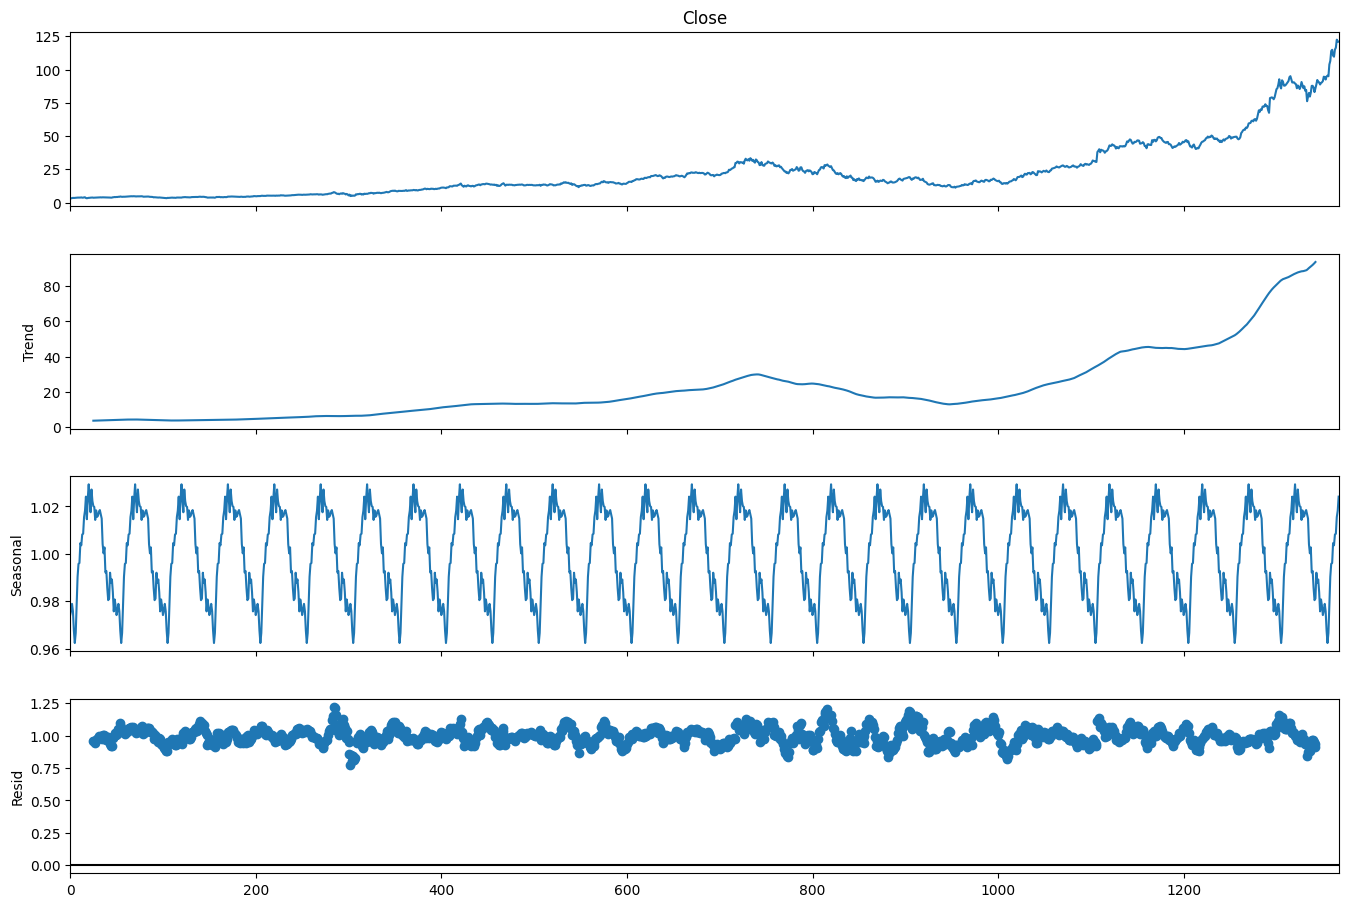

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 50)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;"> 🦄 P value Calculation</span>

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column.</span><br>
    </div>

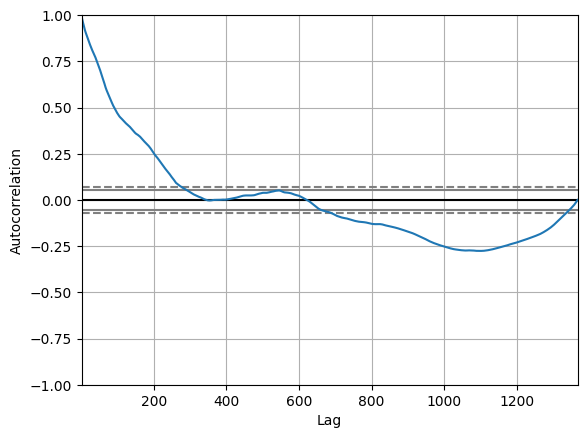

In [9]:
pd.plotting.autocorrelation_plot(data["Close"])
plt.show()

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ In the above autocorrelation plot, the curve is moving down after the 10th line of the first boundary. That is how to decide the p-value. Hence the value of p is 10. </span><br>
    </div>

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;"> 🤖 q value Calculation</span>

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸  We can find the value of q by plotting the partial autocorrelation plot. </span><br>
    </div>

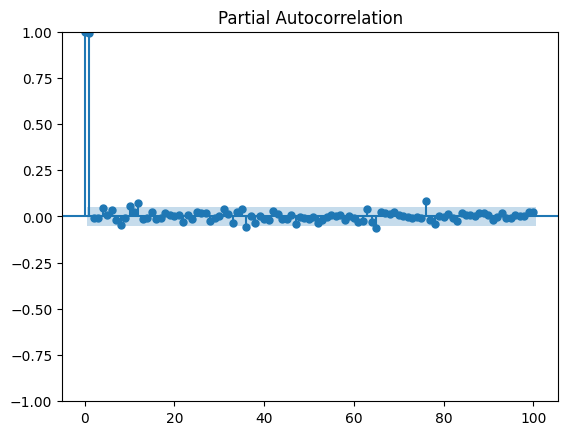

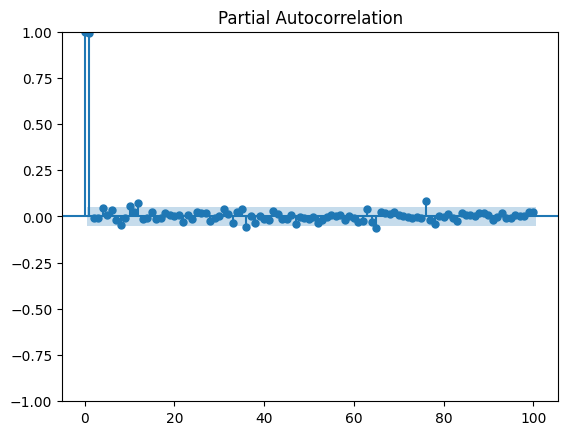

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"],lags=100)

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2 </span><br>
    </div>

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;"> 🚁 d value </span>

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;">☸ The value of d is either 0 or 1.<br>☸ If the data is stationary, we should use 0,<br>☸ If the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value. </span><br>
    </div>

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">✨ ARIMA Model 📊</span>

In [11]:
p, d, q = 10, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
model_fitted = model.fit() 

In [12]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1368
Model:                ARIMA(10, 1, 2)   Log Likelihood               -1901.257
Date:                Thu, 13 Jun 2024   AIC                           3828.514
Time:                        05:01:09   BIC                           3896.379
Sample:                             0   HQIC                          3853.914
                               - 1368                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0356      0.033      1.069      0.285      -0.030       0.101
ar.L2         -0.9478      0.029    -32.791      0.000      -1.004      -0.891
ar.L3          0.0178      0.023      0.772      0.440      -0.027       0.063
ar.L4         -0.0859      0.019     -4.617      0.000      -0.122      -0.049
ar.L5          0.0981      0.023      4.343      0.000       0.054       0.142
ar.L6          0.0656      0.018      3.693      0.000       0.031       0.100
ar.L7          0.1570      0.021      7.552      0.000       0.116       0.198
ar.L8          0.2167      0.019     11.634      0.000       0.180       0.253
ar.L9          0.1122      0.017      6.655      0.000       0.079       0.145
ar.L10         0.0734      0.020      3.759      0.000       0.035       0.112
ma.L1         -0.0414      0.028     -1.504      0.133      -0.095       0.013
ma.L2          0.8929      0.025     36.041      0.000       0.844       0.941
sigma2         0.9452      0.012     81.016      0.000       0.922       0.968
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             35450.37
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              43.57   Skew:                             1.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
predictions = model_fitted.predict()
print(predictions)

0         0.000000
1         3.405500
2         3.195327
3         3.422027
4         3.572415
           ...    
1363    111.563975
1364    116.798703
1365    117.750552
1366    123.287104
1367    121.439739
Name: predicted_mean, Length: 1368, dtype: float64


<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ The predicted values doess not give a accurate predicted values because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model: </span><br>
    </div>

<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">✨Seasonal-ARIMA Model 📊</span>

In [14]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47203D+00    |proj g|=  3.13900D-01

At iterate    5    f=  1.40274D+00    |proj g|=  6.89620D-03

At iterate   10    f=  1.39975D+00    |proj g|=  3.60763D-02

At iterate   15    f=  1.39162D+00    |proj g|=  1.37424D-02

At iterate   20    f=  1.39032D+00    |proj g|=  1.21044D-03

At iterate   25    f=  1.39011D+00    |proj g|=  9.31023D-03

At iterate   30    f=  1.38894D+00    |proj g|=  4.37332D-03

At iterate   35    f=  1.38857D+00    |proj g|=  9.39161D-03

At iterate   40    f=  1.38819D+00    |proj g|=  6.09296D-03

At iterate   45    f=  1.38814D+00    |proj g|=  1.67240D-03

At iterate   50    f=  1.38780D+00    |proj g|=  1.28905D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">☸ let’s predict the future stock prices using the SARIMA model for the next 20 days: </span><br>
    </div>

In [15]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

1368    120.827612
1369    120.878170
1370    122.694929
1371    124.851472
1372    126.307452
1373    126.487891
1374    125.475097
1375    125.474168
1376    125.612595
1377    127.737017
1378    128.995098
1379    129.745252
1380    129.330978
1381    129.268256
1382    129.415796
1383    129.523354
1384    131.075271
1385    131.531276
1386    131.349021
1387    131.127282
1388    130.375348
Name: predicted_mean, dtype: float64


<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">✨Plotting The Predictions 📊</span>

<Axes: >

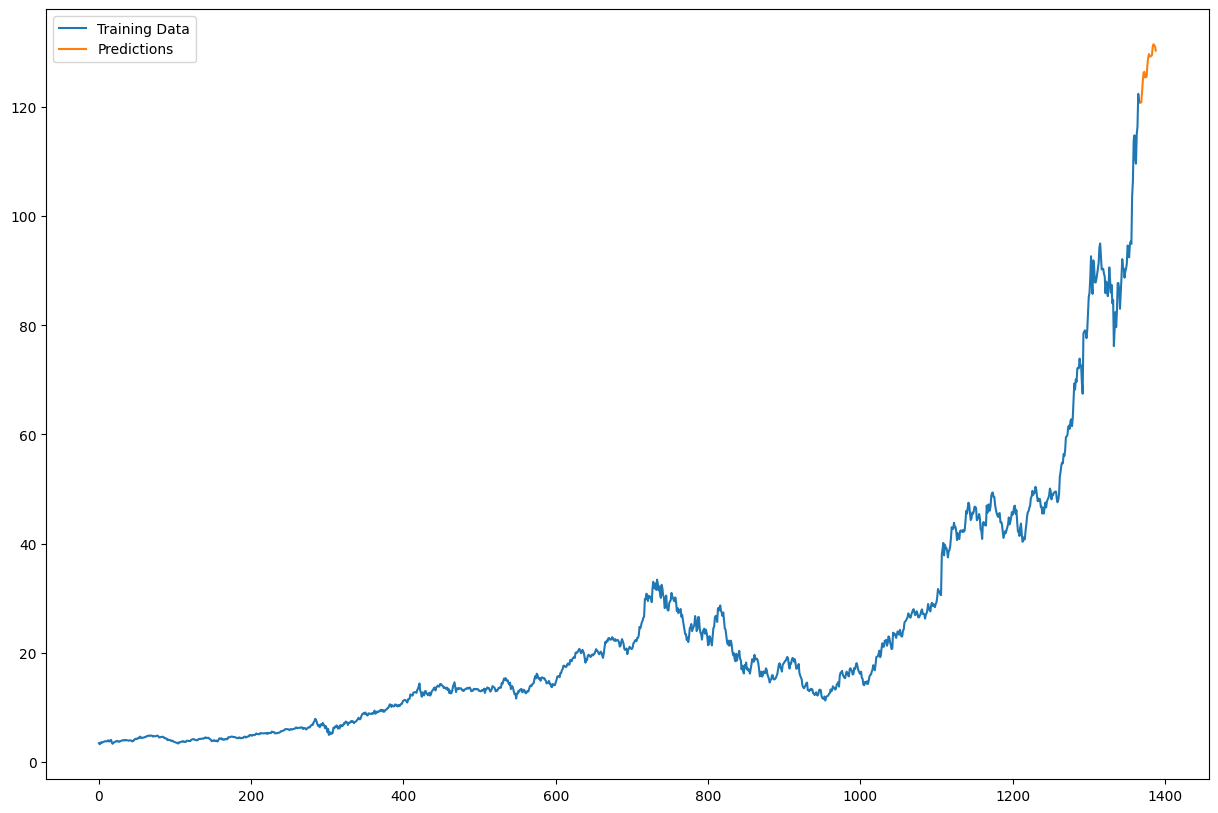

In [16]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index,
    y=data["Close"],
    mode='lines',
    name='Training Data'
))

fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions'
))

fig.update_layout(
    title="Training Data vs Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend=dict(x=0, y=1, traceorder="normal"),
    width=900,
    height=600
)

fig.show()

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">Please read the Above markdown comments to understand more about the ARIMA Model. If you find anything wrong please let me know in comments.  </span><br>
    </div>

<div style ="background-color:white;border:5px solid yellow;padding:20px;border-radius:20px;">
<span style="font-size: 18px;font-family: 'Lucida Console', Courier, monospace;color: orange;margin:15px;">If you find this useful please upvote and visit my other works.  </span><br>
    </div>

<center>
<span style="color:white;font-family: 'Lucida Console', Courier, monospace;font-size:30px; margin-bottom:30px;">✨ Thank you For Your Time 🦄👾</span>
    </center>